In [ ]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train,restore
from easydict import EasyDict
import os
import tifffile
from oct.utils import generate_dataset, stack
import cv2
from basicsr.utils.dataset import normalize, resize
import numpy as np


SSAI_PATH = "C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D"
# SSAI_PATH = "/Users/ramachandrank/Repos/SSAI-3D/"

c:\Users\rkulothu\Documents\Repos\SSAI-oct\SSAI-3D\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

raw_tif_path = f"{SSAI_PATH}/raw_data/0704_OD_B-scans_log_16bits.tif"
project_depth = 4
data_save_path = "data_e2e"
results_save_path = "results"

In [ ]:
generate_dataset.create_projected_data_with_1step_slide(raw_tif_path, data_save_path, project_depth = project_depth, projected_dir = "projected_data")

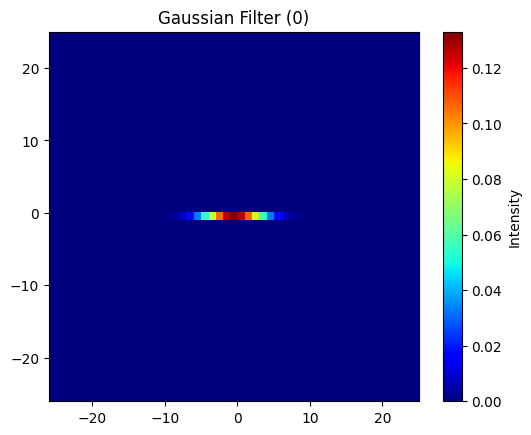

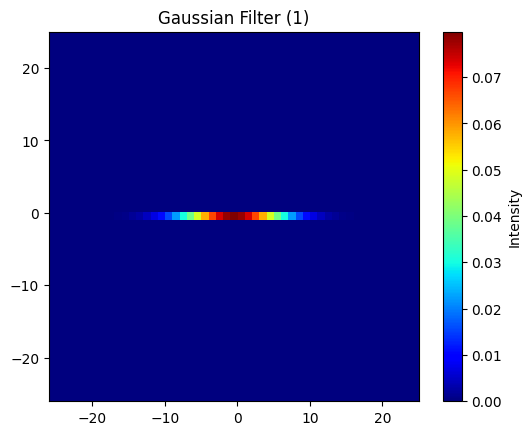

In [ ]:
generate_dataset.create_synthetic_data_from_slices(f"{data_save_path}/projected_data", data_save_path, 2, 2, 2, True, True)

In [ ]:
generate_dataset.create_downsampled_data_from_slices(f"{data_save_path}/projected_data", data_save_path, 2, 2)

In [6]:
generate_dataset.create_zs_dataset(data_save_path)

In [7]:
configs = EasyDict({
    'model_path' : f'{SSAI_PATH}/pretrained_models/NAFNet-REDS-width64.pth',
    'lq_pth': os.path.join(data_save_path, 'zs_lq'),
    'gt_pth': os.path.join(data_save_path, 'zs_gt'),
    'lr': 1e-4
})
operation = Surgeon(configs)
operation.get_zeroshot_information()
surgeon_trainer = SurgeonTrainer()
elementwise_input = operation.input_dict.copy()
rank = surgeon_trainer.forward_all(elementwise_input)

Disable distributed.
none
rank: 0
ws: 1


2025-05-19 18:44:54,706 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x0000019DC7108AC0>
.. cosineannealingLR
grad_norm
snip
grasp
fisher


c:\Users\rkulothu\Documents\Repos\SSAI-oct\SSAI-3D\.venv\lib\site-packages\torch\nn\modules\module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


plain
synflow
None weight loaded


In [8]:
trainer_train(rank, data_save_path)

Disable distributed.
none
Path already exists. Rename it to c:\users\rkulothu\documents\repos\ssai-oct\ssai-3d\experiments\demo_neurons_archived_20250519_184616


2025-05-19 18:46:16,677 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+3aa7045
	PyTorch: 1.11.0+cu113
	TorchVision: 0.12.0+cu113
2025-05-19 18:46:16,677 INFO: 
  name: demo_neurons
  model_type: ImageRestorationModel
  scale: 1
  num_gpu: 1
  manual_seed: 10
  datasets:[
    train:[
      name: reds-train
      type: PairedImageDataset
      dataroot_gt: data_e2e/gt
      dataroot_lq: data_e2e/

 load net keys <built-in method keys of dict object at 0x0000019E22593C80>
.. cosineannealingLR


2025-05-19 18:46:27,990 INFO: Start training from epoch: 0, iter: 0
2025-05-19 18:47:42,933 INFO: [demo_..][epoch:  0, iter:     200, lr:(9.055e-05,)] [eta: 0:05:27, time (data): 0.344 (0.001)] l_pix: -2.9932e+01 
2025-05-19 18:48:52,690 INFO: [demo_..][epoch:  0, iter:     400, lr:(6.563e-05,)] [eta: 0:03:47, time (data): 0.348 (0.001)] l_pix: -2.9868e+01 
2025-05-19 18:49:27,652 INFO: Saving models and training states.
2025-05-19 18:50:03,047 INFO: [demo_..][epoch:  0, iter:     600, lr:(3.476e-05,)] [eta: 0:02:27, time (data): 0.347 (0.000)] l_pix: -3.0226e+01 
2025-05-19 18:51:13,024 INFO: [demo_..][epoch:  0, iter:     800, lr:(9.732e-06,)] [eta: 0:01:12, time (data): 0.349 (0.000)] l_pix: -3.0407e+01 
2025-05-19 18:52:23,058 INFO: [demo_..][epoch:  0, iter:   1,000, lr:(1.002e-07,)] [eta: 0:00:00, time (data): 0.349 (0.001)] l_pix: -3.0540e+01 
2025-05-19 18:52:23,058 INFO: Saving models and training states.
2025-05-19 18:52:23,508 INFO: End of training. Time consumed: 0:05:55
20

In [9]:
generate_dataset.generate_oct_raw_data(raw_pth = raw_tif_path, save_pth= data_save_path, dr = 2,xy_required=True, xz_required=True, yz_required=True)

uint16
(500, 900, 500)


In [10]:
in_pth_xz = os.path.join(data_save_path, 'test_xz')

out_pth_xz = os.path.join(results_save_path, 'test_xz')

restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  'C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth')

Disable distributed.
none


2025-05-19 18:53:09,259 INFO: Loading NAFNetLocal model from C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth.


 load net keys <built-in method keys of dict object at 0x0000019E07D7EC40>


2025-05-19 18:53:09,659 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 500/500 [03:32<00:00,  2.35it/s]


In [ ]:
out_pth_xz = os.path.join(results_save_path, 'test_xz')
stack.create_3d_tiff(out_pth_xz, os.path.join(results_save_path ,"2d_gauss_rec_xz.tiff"))

100%|██████████| 500/500 [00:02<00:00, 167.28it/s]


(500, 1000, 900, 3)
(500, 1000, 900)


In [ ]:
generate_dataset.generate_oct_raw_data(raw_pth = os.path.join(results_save_path ,"2d_gauss_rec_xz.tiff"), save_pth= os.path.join(data_save_path, "restored_input"), dr = 2, yz_required=True)

uint16
(500, 1000, 900)


In [13]:
in_pth_xy = os.path.join(data_save_path, "restored_input", 'test_yz')

out_pth_xy = os.path.join(results_save_path, "restored_input", 'test_xy')

restore(input_pth = in_pth_xy,\
        output_pth = out_pth_xy,\
        model_pth =  'C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth')

Disable distributed.


none


2025-05-19 18:56:59,703 INFO: Loading NAFNetLocal model from C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth.


 load net keys <built-in method keys of dict object at 0x0000019E26514200>


2025-05-19 18:57:00,136 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 1000/1000 [07:03<00:00,  2.36it/s]


In [ ]:
out_pth_xy = os.path.join(results_save_path, "restored_input",'test_xy')
stack.create_3d_tiff(out_pth_xy, os.path.join(results_save_path ,"2d_gauss_rec_final.tiff"))

100%|██████████| 1000/1000 [00:05<00:00, 169.73it/s]


(1000, 1000, 900, 3)
(1000, 1000, 900)
